### Garima Thakur

GRIP : The Sparks Foundation

Task 4: Performing Exploratory Data Analysis on Terrorism.

In this problem we have to find out thefind out the hot zone of terrorism.

In [1]:
#Importing all the important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read csv file
terror = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = 'cp1252')
terror.head(10)

In [4]:
# Check for the null values
terror.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [5]:
# Check shape
terror.shape

(181691, 135)

In [38]:
#Check information
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 85 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   eventid             181691 non-null  int64  
 1   iyear               181691 non-null  int64  
 2   imonth              181691 non-null  int64  
 3   iday                181691 non-null  int64  
 4   country             181691 non-null  int64  
 5   country_txt         181691 non-null  object 
 6   region              181691 non-null  int64  
 7   region_txt          181691 non-null  object 
 8   city                181257 non-null  object 
 9   latitude            177135 non-null  float64
 10  longitude           177134 non-null  float64
 11  location            55495 non-null   object 
 12  summary             115562 non-null  object 
 13  multiple            181690 non-null  float64
 14  success             181691 non-null  int64  
 15  suicide             181691 non-nul

In [7]:
# description of the data
terror.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
terror.iyear.unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [9]:
terror.shape

(181691, 135)

In [10]:
terror.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


In [11]:
print(terror.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [12]:
terror = terror.drop(['approxdate', 'extended', 'resolution','provstate','specificity', 'vicinity','crit1', 'crit2', 'crit3',
                      'doubtterr', 'alternative', 'alternative_txt','corp1', 'natlty1', 
                      'natlty1_txt','corp2', 'natlty2', 'corp3','natlty3', 
                      'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 
                      'gname3', 'gsubname3',  'guncertain1', 'guncertain2', 
                      'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 
                      'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3',
                      'claimmode3_txt', 'compclaim', 'property', 'propextent', 'propextent_txt', 'propvalue', 'propcomment',
                      'ishostkid', 'nhostkid',
                      'nhostkidus'], axis = 1)

In [13]:
terror.isnull()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,city,latitude,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True
181689,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True


## Data Visualization

In [39]:
# plt.figure(figsize=(15,10), dpi = 80, facecolor='w', edgecolor='k')
# df.groupby(['country_txt'])['nkill'].sum().plot(kind = 'line')

<AxesSubplot:>

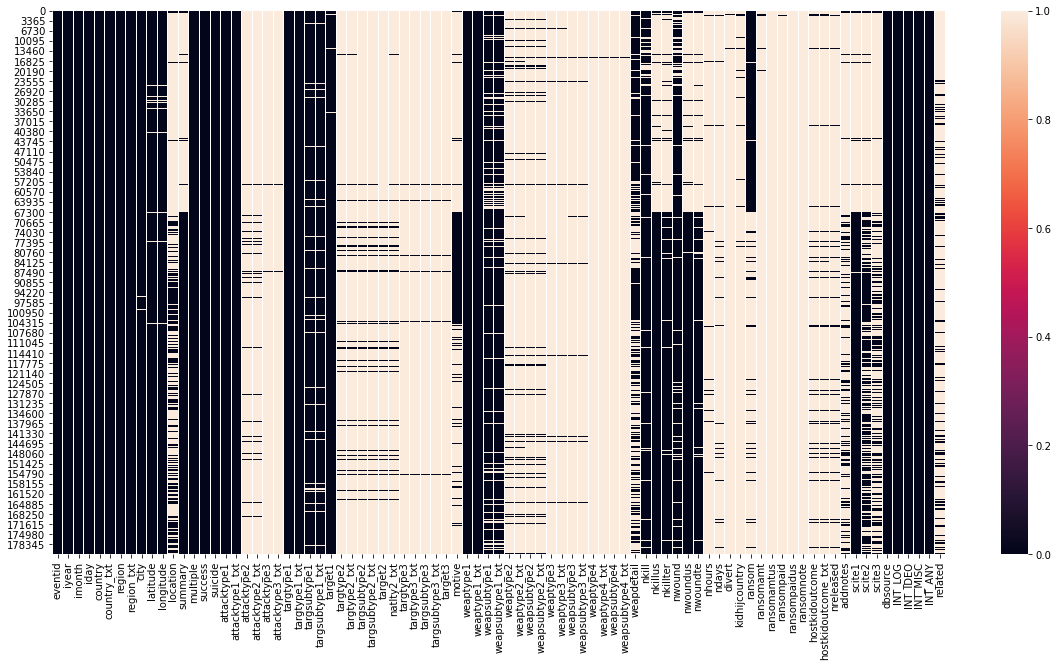

In [85]:
plt.figure(figsize = (20,10))
sns.heatmap(terror.isnull())

#### The most affected years

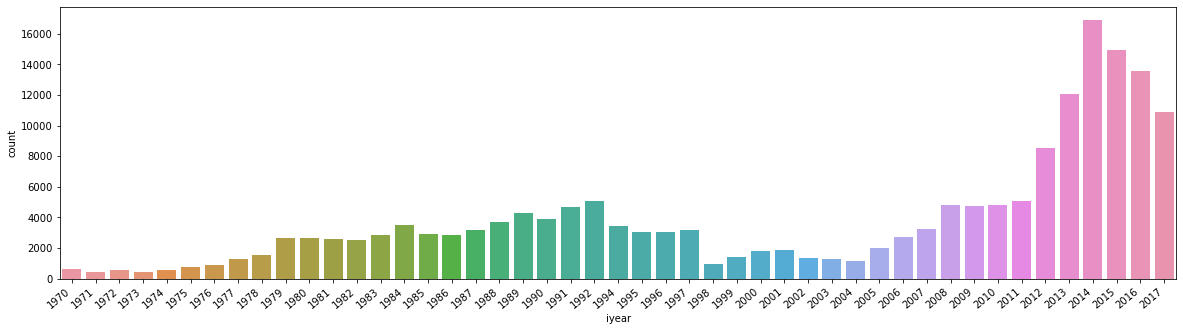

In [84]:
plt.figure(figsize=(20,5)) 
ax = sns.countplot(terror['iyear'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Most of the attacks happened in the year 2014

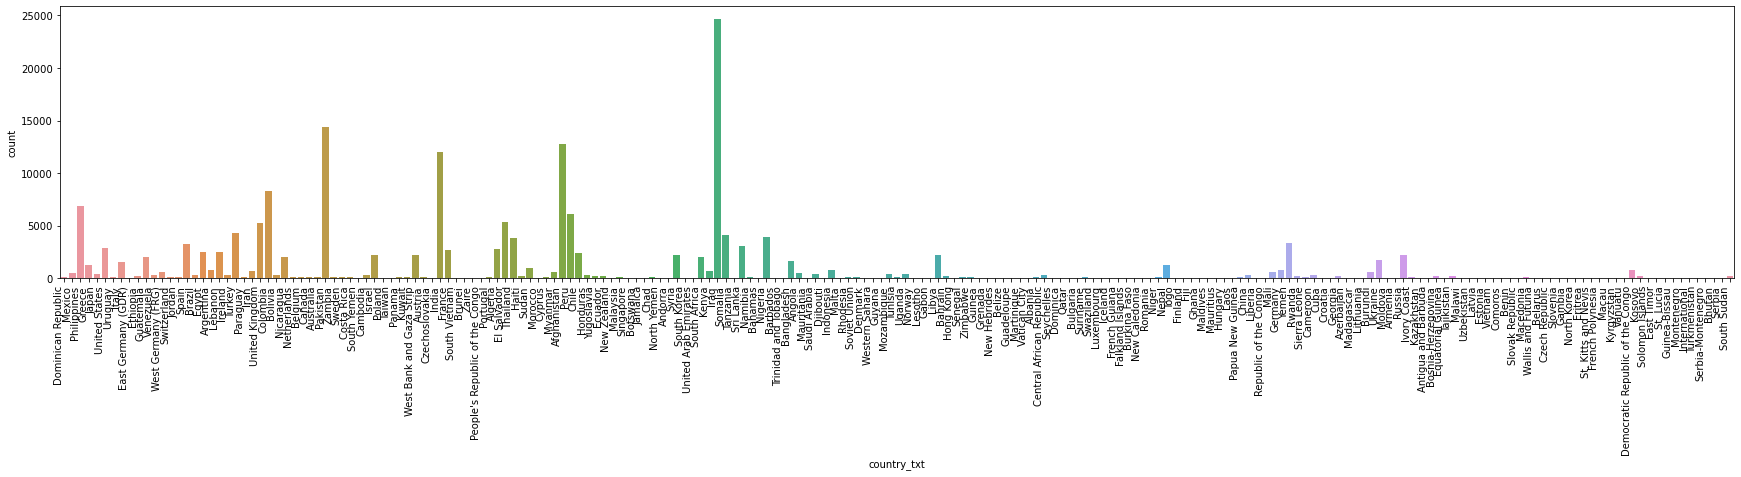

In [80]:
# plt.figure(figsize = (20,5))
# ax = terror.groupby(['country_txt']).sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'pink')
# # ax = sns.barplot(x= 'country_txt', y = 'nkill', data = terror)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# plt.show()



plt.figure(figsize=(30,5)) 
ax = sns.countplot(terror['country_txt'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

Max terrorist attack has been done in Iraq  

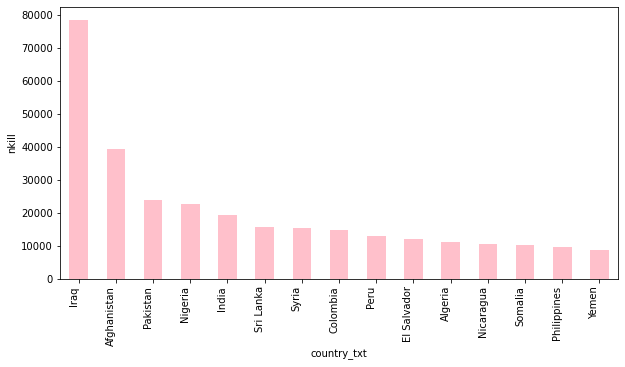

In [52]:
plt.figure(figsize = (10,5))
ax = terror.groupby(['country_txt'])['nkill'].sum().sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'pink')
# ax = sns.barplot(x= 'country_txt', y = 'nkill', data = terror)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("nkill")
plt.show()

Most of the people of Iraq has been killed in terrorism 

In [76]:
terror.head(5)

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,city,latitude,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,18.456792,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,130,Mexico,1,North America,Mexico city,19.371887,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,15.478598,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Athens,37.997490,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,33.580412,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### Analyze the data based on the attributes given

[Text(0, 0, 'Central America & Caribbean'),
 Text(1, 0, 'North America'),
 Text(2, 0, 'Southeast Asia'),
 Text(3, 0, 'Western Europe'),
 Text(4, 0, 'East Asia'),
 Text(5, 0, 'South America'),
 Text(6, 0, 'Eastern Europe'),
 Text(7, 0, 'Sub-Saharan Africa'),
 Text(8, 0, 'Middle East & North Africa'),
 Text(9, 0, 'Australasia & Oceania'),
 Text(10, 0, 'South Asia'),
 Text(11, 0, 'Central Asia')]

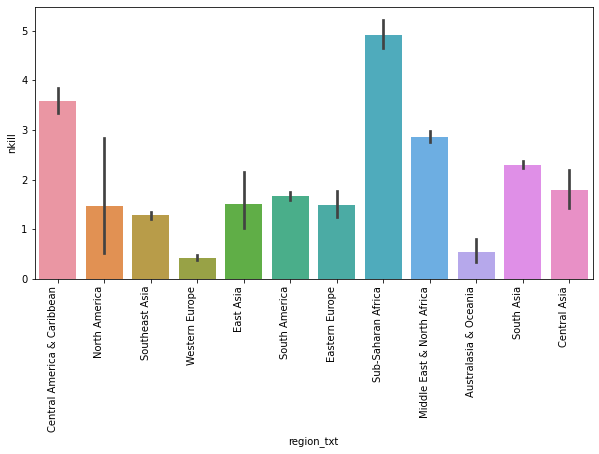

In [74]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x ='region_txt' , y = 'nkill' , data = terror )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

People of Sub Saharan Africa has died the most.

[Text(0, 0, 'Central America & Caribbean'),
 Text(1, 0, 'North America'),
 Text(2, 0, 'Southeast Asia'),
 Text(3, 0, 'Western Europe'),
 Text(4, 0, 'East Asia'),
 Text(5, 0, 'South America'),
 Text(6, 0, 'Eastern Europe'),
 Text(7, 0, 'Sub-Saharan Africa'),
 Text(8, 0, 'Middle East & North Africa'),
 Text(9, 0, 'Australasia & Oceania'),
 Text(10, 0, 'South Asia'),
 Text(11, 0, 'Central Asia')]

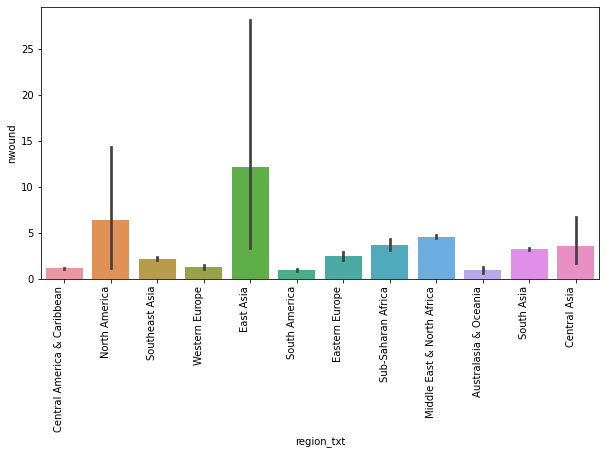

In [83]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x ='region_txt' , y = 'nwound' , data = terror )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

[Text(0, 0, 'Assassination'),
 Text(1, 0, 'Hostage Taking (Kidnapping)'),
 Text(2, 0, 'Bombing/Explosion'),
 Text(3, 0, 'Facility/Infrastructure Attack'),
 Text(4, 0, 'Armed Assault'),
 Text(5, 0, 'Hijacking'),
 Text(6, 0, 'Unknown'),
 Text(7, 0, 'Unarmed Assault'),
 Text(8, 0, 'Hostage Taking (Barricade Incident)')]

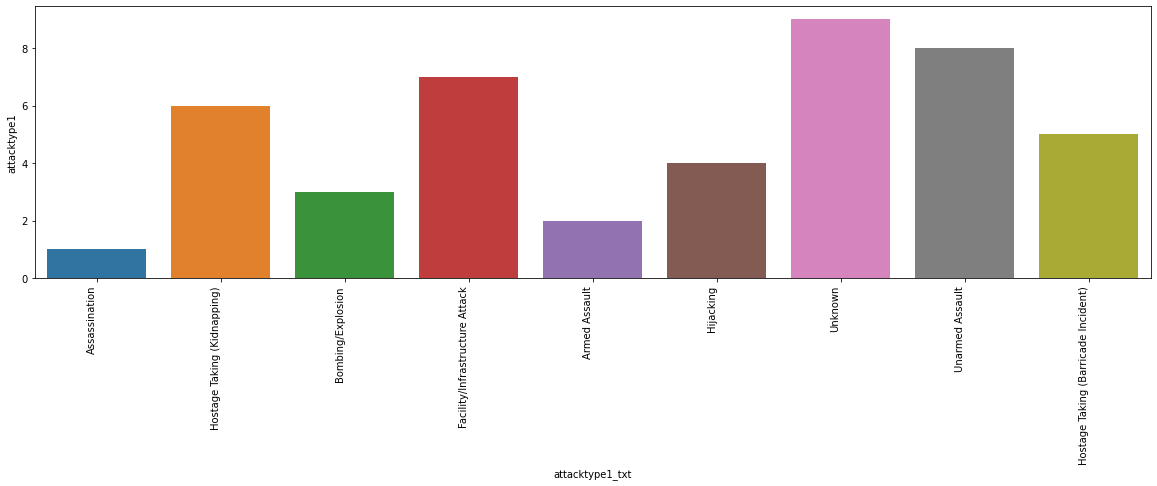

In [97]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x ='attacktype1_txt',y= 'attacktype1' , data = terror )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

[Text(0, 0, 'Armed Assault'),
 Text(1, 0, 'Facility/Infrastructure Attack'),
 Text(2, 0, 'Bombing/Explosion'),
 Text(3, 0, 'Hostage Taking (Kidnapping)'),
 Text(4, 0, 'Assassination'),
 Text(5, 0, 'Hijacking'),
 Text(6, 0, 'Hostage Taking (Barricade Incident)'),
 Text(7, 0, 'Unknown'),
 Text(8, 0, 'Unarmed Assault')]

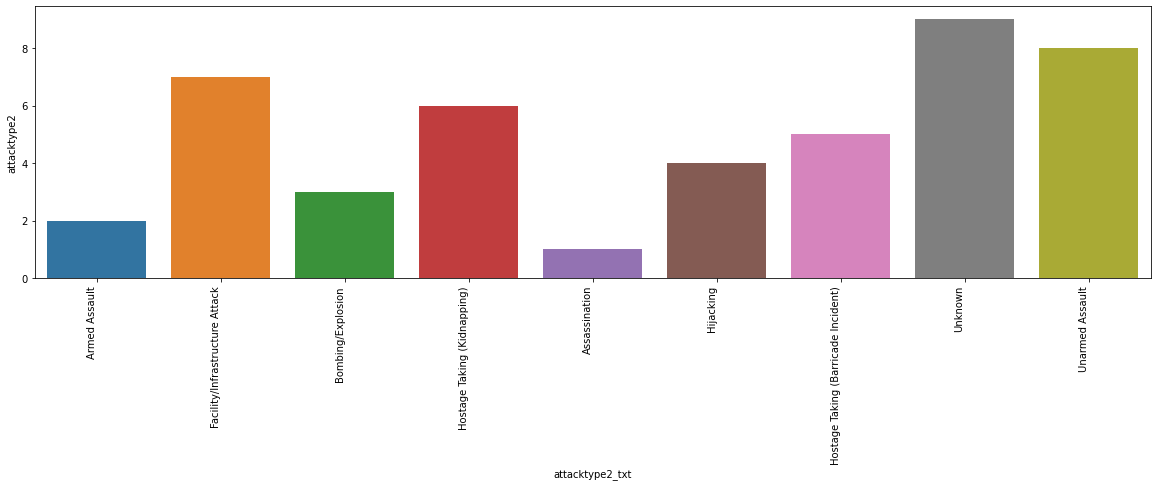

In [70]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x ='attacktype2_txt',y= 'attacktype2' , data = terror )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

[Text(0, 0, 'Armed Assault'),
 Text(1, 0, 'Hijacking'),
 Text(2, 0, 'Facility/Infrastructure Attack'),
 Text(3, 0, 'Bombing/Explosion'),
 Text(4, 0, 'Hostage Taking (Kidnapping)'),
 Text(5, 0, 'Assassination'),
 Text(6, 0, 'Hostage Taking (Barricade Incident)'),
 Text(7, 0, 'Unarmed Assault')]

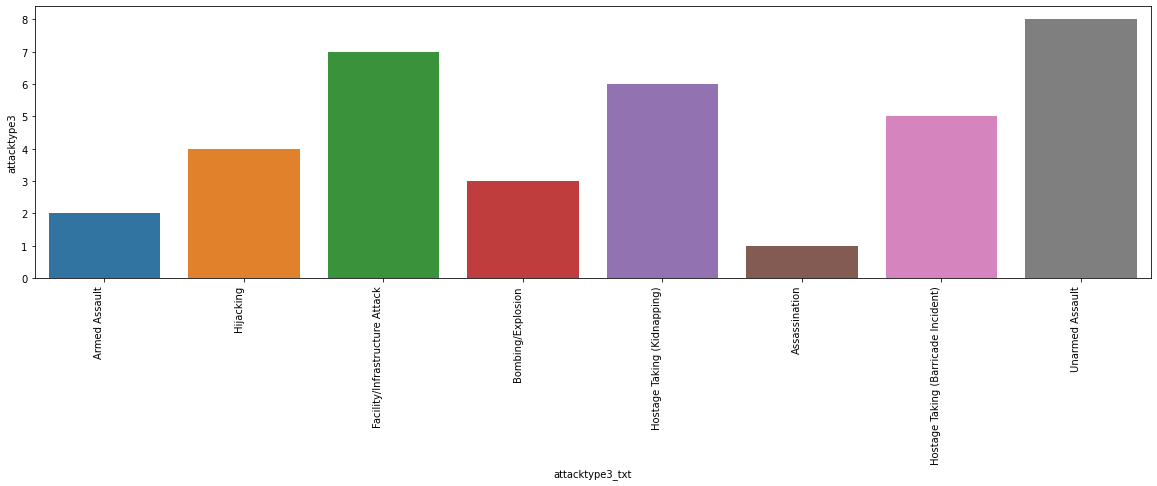

In [95]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x ='attacktype3_txt',y= 'attacktype3' , data = terror )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

Above graphs show the relation between attactype and attacktype_txt

In [27]:
terror.pivot_table(columns = 'attacktype1_txt', values = 'nkill', aggfunc = 'sum')


attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


The above pivot table shows them how many people got killed in attacktype1 and how they got killed 

In [103]:
terror.pivot_table(columns = 'attacktype2_txt', values = 'nkill', aggfunc = 'sum')


attacktype2_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,25933.0,392.0,6341.0,8273.0,7.0,112.0,2079.0,3.0,10.0


The above pivot table shows them how many people got killed in attacktype2 and how they got killed.

In [29]:
terror.pivot_table(columns = 'attacktype3_txt', values = 'nkill', aggfunc = 'sum')


attacktype3_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault
nkill,2491.0,13.0,35.0,1684.0,18.0,22.0,1088.0,1.0


The above pivot table shows them how many people got killed in attacktype3 and how they got killed

<AxesSubplot:xlabel='multiple', ylabel='count'>

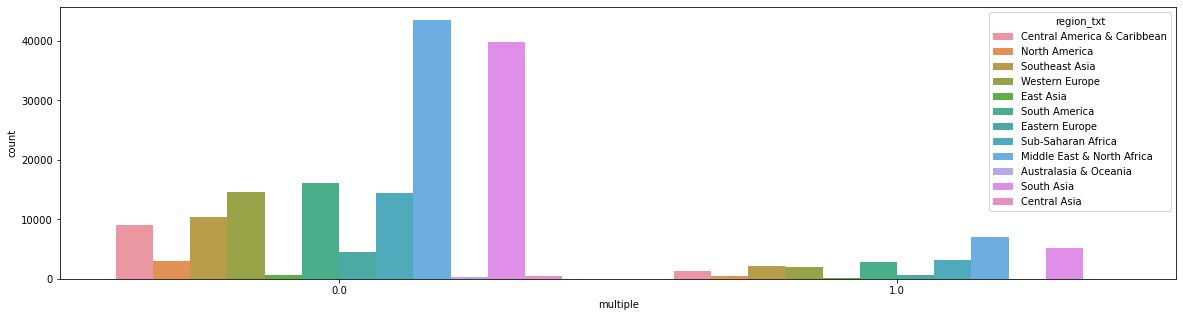

In [86]:
plt.figure(figsize=(20,5))
sns.countplot(x='multiple', hue = 'region_txt' , data=terror)

Regions where multiple attacts have been reported are, South Asia and Middle East and north Africa.

<AxesSubplot:xlabel='multiple', ylabel='count'>

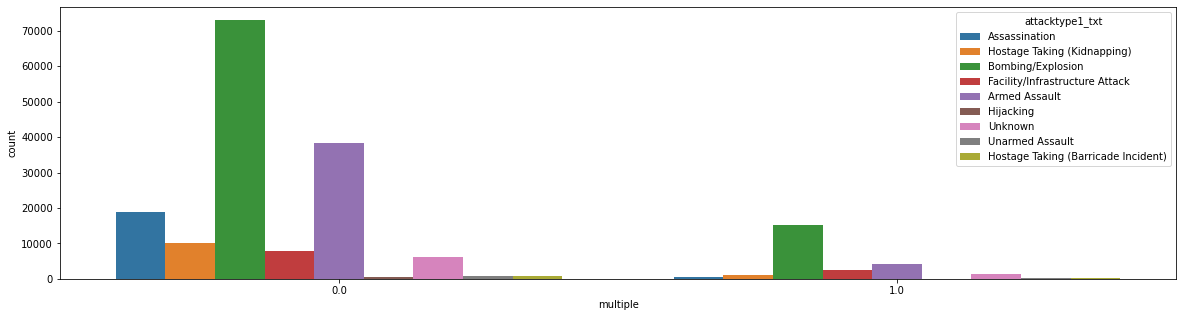

In [87]:
plt.figure(figsize=(20,5))
sns.countplot(x='multiple', hue = 'attacktype1_txt' , data=terror)

Bombing, armed assault and assassination are the kind of attacks that have has been seen the most.

<AxesSubplot:xlabel='region', ylabel='iyear'>

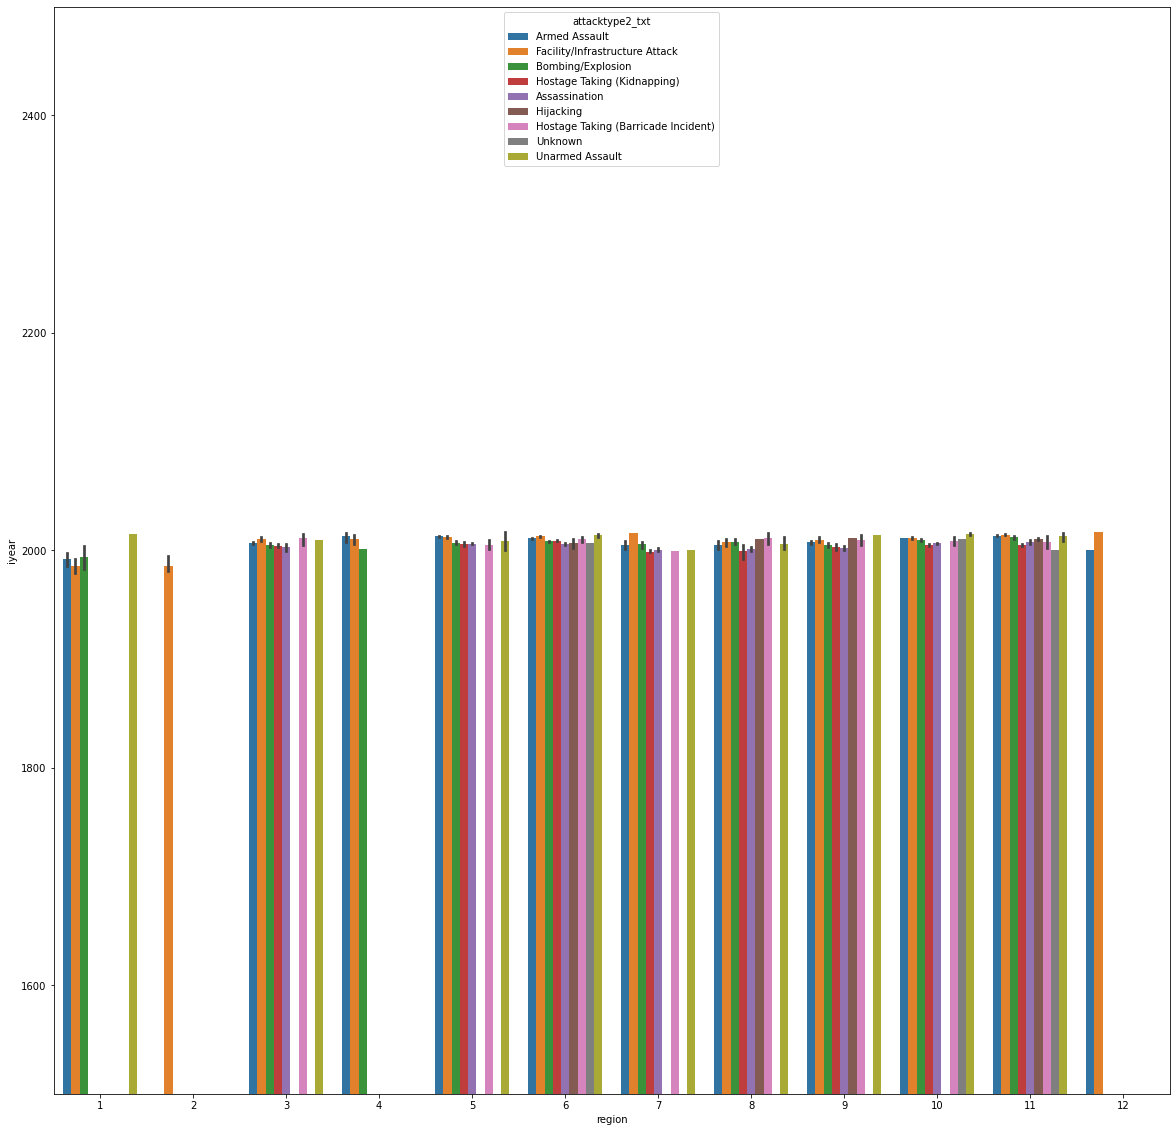

In [114]:
plt.figure(figsize=(20,20))
plt.axis([0,15,1500,2500])
sns.barplot(x='region', y = 'iyear', hue = 'attacktype2_txt', data=terror)

The above graph shows the types of attack occured in th particular region and in what year

## Security Issues

[Text(0, 0, 'Unknown'),
 Text(1, 0, 'Explosives'),
 Text(2, 0, 'Incendiary'),
 Text(3, 0, 'Firearms'),
 Text(4, 0, 'Chemical'),
 Text(5, 0, 'Melee'),
 Text(6, 0, 'Sabotage Equipment'),
 Text(7, 0, 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'),
 Text(8, 0, 'Fake Weapons'),
 Text(9, 0, 'Radiological'),
 Text(10, 0, 'Other'),
 Text(11, 0, 'Biological')]

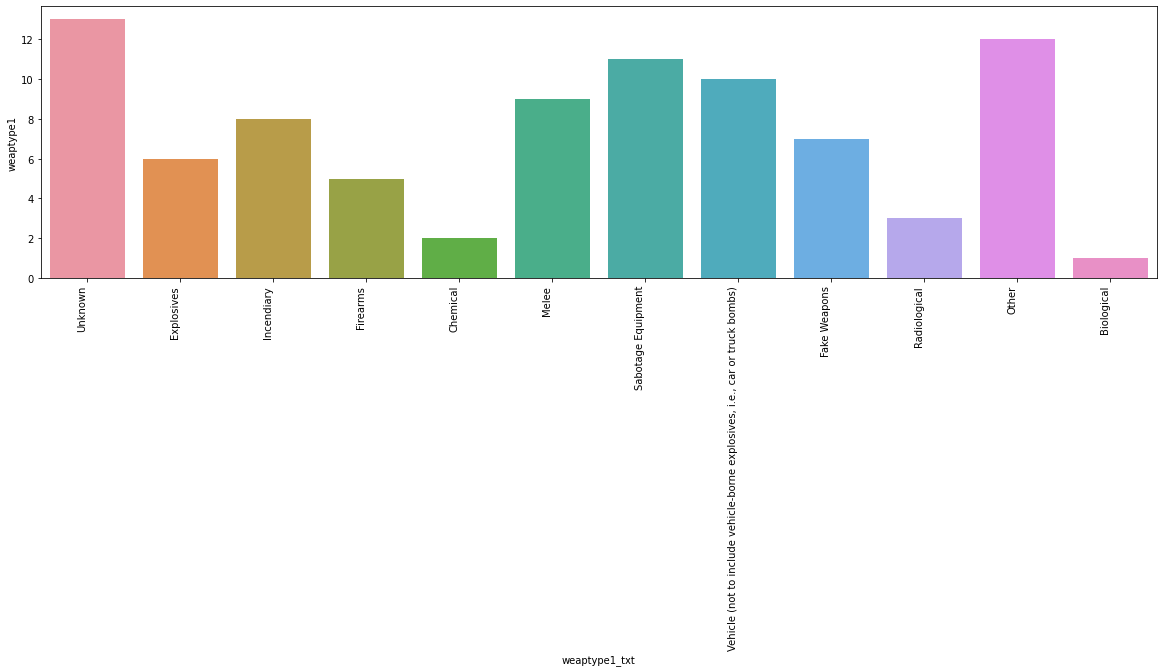

In [99]:
plt.figure(figsize=(20,5))
ax = sns.barplot(y='weaptype1' ,x='weaptype1_txt' , data=terror)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

The above graph shows how many people are killed in different type of mishappenings

<AxesSubplot:xlabel='attacktype1', ylabel='count'>

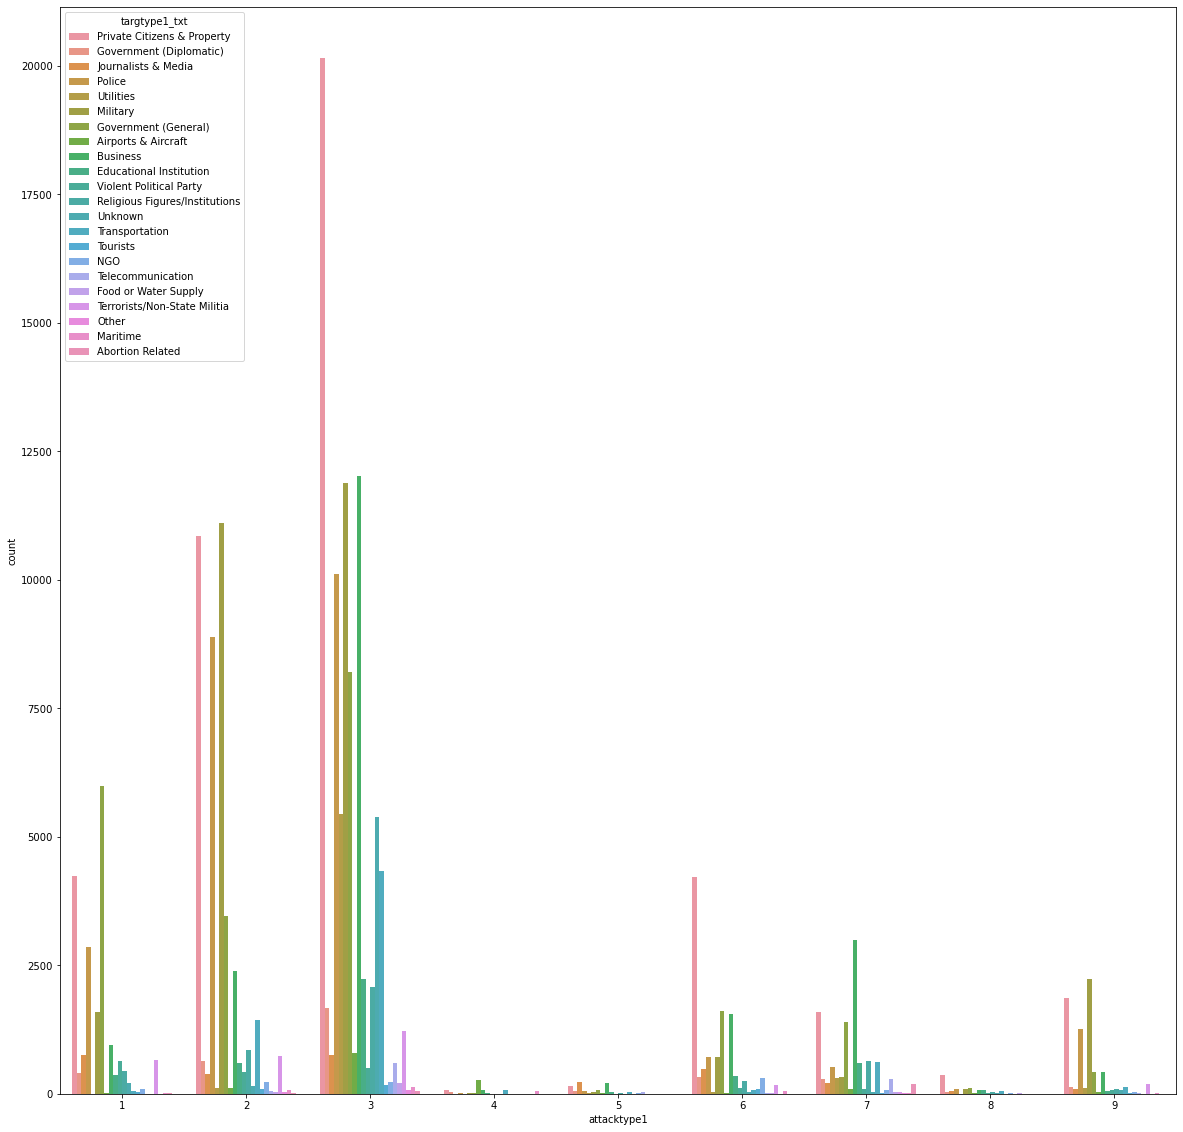

In [35]:
plt.figure(figsize=(20,20))
sns.countplot(x='attacktype1', hue = 'targtype1_txt' , data=terror)

We can see most of the attack 1 is done on the private citizens and properties 

Thank you!